In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
%matplotlib inline

# Load Train Data Set

In [5]:
data = pd.read_csv('train.csv')
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [6]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Wrangling

In [131]:
col = ['PassengerId','Survived','Pclass']
X = data.loc[:,col]
X.head(100)

PassengerId  Survived  Pclass
0             1         0       3
1             2         1       1
2             3         1       3
3             4         1       1
4             5         0       3
5             6         0       3
6             7         0       1
7             8         0       3
8             9         1       3
9            10         1       2
10           11         1       3
11           12         1       1
12           13         0       3
13           14         0       3
14           15         0       3
15           16         1       2
16           17         0       3
17           18         1       2
18           19         0       3
19           20         1       3
20           21         0       2
21           22         1       2
22           23         1       3
23           24         1       1
24           25         0       3
25           26         1       3
26           27         0       3
27           28         0       1
28           29         1       3
29           30         0       3
..          ...       ...     ...
70           71         0       2
71           72         0       3
72           73         0       2
73           74         0       3
74           75         1       3
75           76         0       3
76           77         0       3
77           78         0       3
78           79         1       2
79           80         1       3
80           81         0       3
81           82         1       3
82           83         1       3
83           84         0       1
84           85         1       2
85           86         1       3
86           87         0       3
87           88         0       3
88           89         1       1
89           90         0       3
90           91         0       3
91           92         0       3
92           93         0       1
93           94         0       3
94           95         0       3
95           96         0       3
96           97         0       1
97           98         1       1
98           99         1       2
99          100         0       2

[100 rows x 3 columns]

In [104]:
embarked_to_num ={'S':2,
          'C':1,
          'Q':0}
data['tmp']= data['Embarked'].map(embarked_to_num)
y = data['tmp']

In [132]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  tmp  
0      0         A/5 21171   7.2500   NaN        S  2.0  
1      0          PC 17599  71.2833   C85        C  1.0  
2      0  STON/O2. 3101282   7.9250   NaN        S  2.0  
3      0            113803  53.1000  C123        S  2.0  
4      0            373450   8.0500   NaN        S  2.0

# Visualisasion

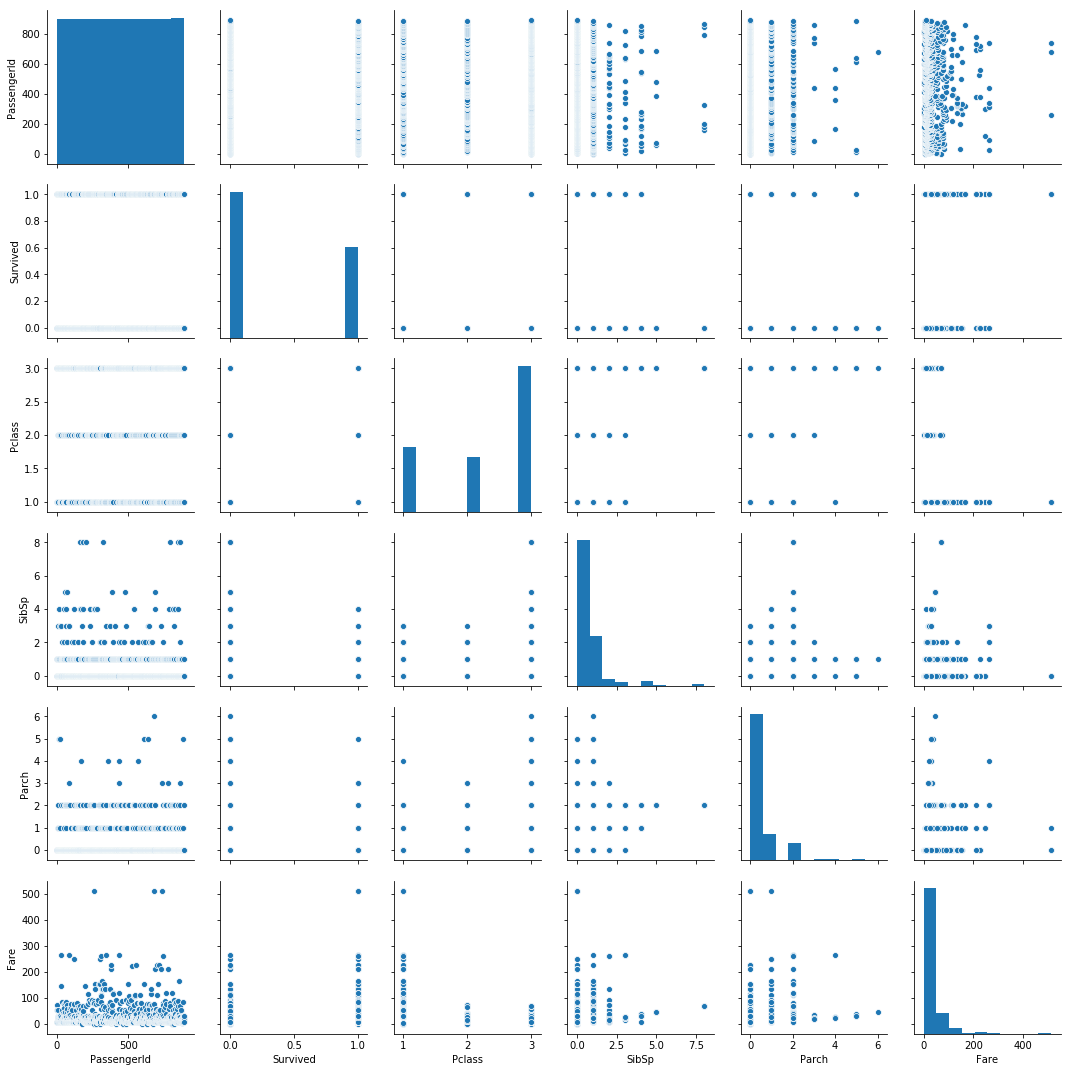

In [106]:
sns.pairplot(X)


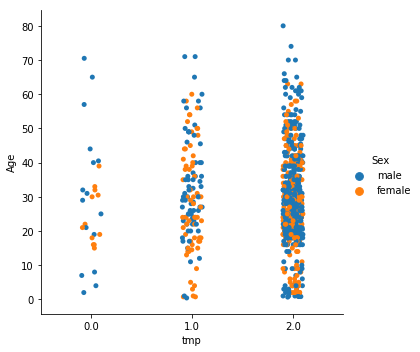

In [107]:
sns.catplot(x='tmp', y="Age", hue='Sex', data=data)

In [108]:
data.shape

(891, 13)

# Splitting the train and test

In [109]:
# num_split= 891

# X_train, X_test, y_train, y_test =  X[:num_split], X[num_split:], y[:num_split], y[num_split:]

In [133]:
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.8, random_state=0)

/opt/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Gaussian Process Classification (GPC)

In [134]:
std_x = StandardScaler()

In [135]:
X_train.head()

PassengerId  Survived  Pclass
140          141         0       3
439          440         0       2
817          818         0       2
378          379         0       3
491          492         0       3

In [136]:
X_std_train =std_x.fit_transform(X_train)

/opt/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/anaconda3/envs/ml/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [137]:
X.head()

PassengerId  Survived  Pclass
0            1         0       3
1            2         1       1
2            3         1       3
3            4         1       1
4            5         0       3

In [138]:
y.head()

0    2.0
1    1.0
2    2.0
3    2.0
4    2.0
Name: tmp, dtype: float64

In [139]:
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)

In [143]:
y_train.describe()

count    710.000000
mean       1.638028
std        0.641724
min        0.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        2.000000
Name: tmp, dtype: float64

In [3]:
#test apa aja
data.head()

NameError: name 'data' is not defined